In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

def load_and_process_data(file_path):
    # Read the CSV file
    price = pd.read_csv(file_path)
    
    # Define non-mainland regions to exclude
    excluded_regions = [
        "Hawaii", "Alaska", "Puerto Rico", 
        "United States Virgin Islands", 
        "Commonwealth of the Northern Mariana Islands", 
        "Guam", "American Samoa"
    ]
    
    # Filter out the excluded regions
    price = price[~price['NAME'].isin(excluded_regions)]
    
    # Extract the housing price matrix (from column 21 onwards)
    price_matrix = price.iloc[:, 20:].values
    
    # Handle missing values:
    # Use forward fill (equivalent to na.locf in R) - 
    # replace each missing value with the previous value in the same row
    for i in range(price_matrix.shape[0]):
        for j in range(1, price_matrix.shape[1]):
            if np.isnan(price_matrix[i, j]):
                price_matrix[i, j] = price_matrix[i, j-1]
    
    return price_matrix, price

# Load and preprocess the data
file_path = "D:/STDMcw/STDMcw/data/price_coords_16y.csv"
price_matrix, price_df = load_and_process_data(file_path)

# Print processed outputs for verification
print(price_matrix)
print(price_df)


[[ 58620.64503  58734.05564  58674.92719 ... 103998.3631  104363.1015
  104752.8406 ]
 [123045.239   120472.9984  117936.8573  ... 284909.2517  283600.983
  282193.2058 ]
 [119983.4381  118801.0751  118008.3065  ... 212877.4303  213926.7158
  214983.5912 ]
 ...
 [370256.1256  373507.5695  373245.605   ... 585192.9558  584903.0816
  584894.7688 ]
 [ 82440.00359  82226.84003  82088.19377 ... 147732.8513  148627.4581
  149263.6211 ]
 [148694.0978  146535.8843  144402.0088  ... 341128.7285  340408.8952
  339400.9525 ]]
    REGION  DIVISION  STATEFP  STATENS  GEOID      GEOIDFQ STUSPS  \
0        3         5       54  1779805     54  0400000US54     WV   
1        3         5       12   294478     12  0400000US12     FL   
2        2         3       17  1779784     17  0400000US17     IL   
3        2         4       27   662849     27  0400000US27     MN   
4        3         5       24  1714934     24  0400000US24     MD   
5        1         1       44  1219835     44  0400000US44     RI


=========== Analyzing State 0 Housing Prices ===========
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0532 - val_loss: 0.5225
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - val_loss: 0.2953
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - val_loss: 0.1706
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - val_loss: 0.1097
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - val_loss: 0.0667
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0254
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7280e-04 - val_loss: 0.0130
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8499e-04 - val_loss: 0.0290
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3722e-04 - val_loss: 0.0210
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6339e-04 - 

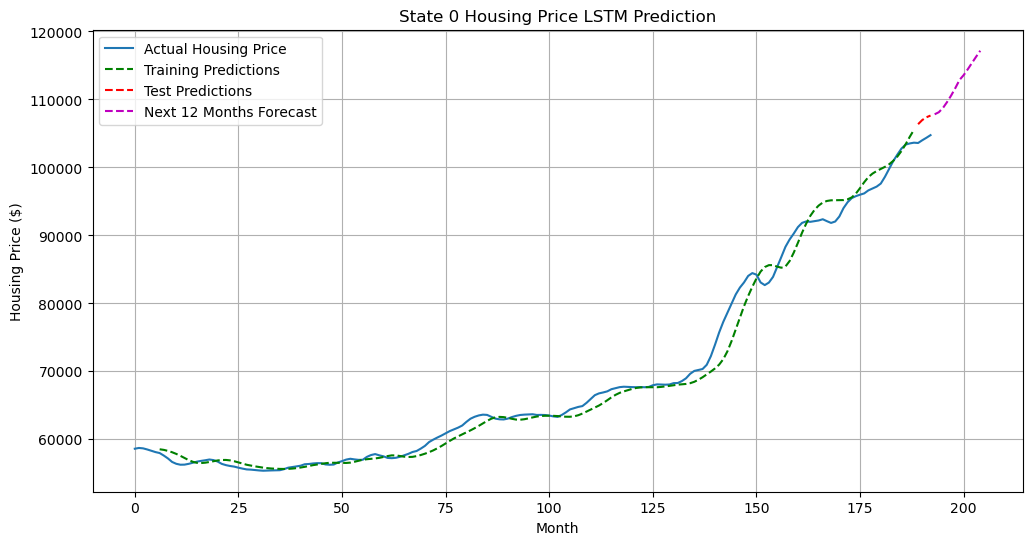

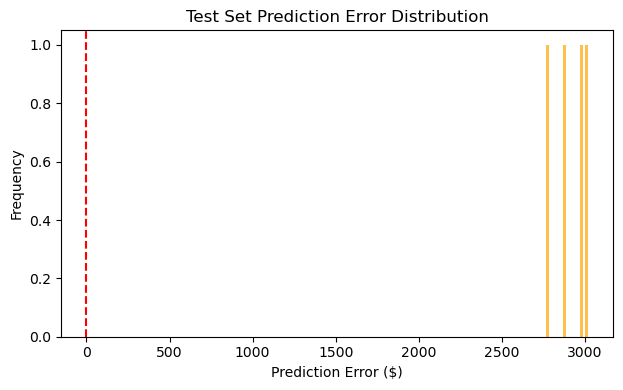


=========== Analyzing State 13 Housing Prices ===========
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1091 - val_loss: 0.3059
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0327 - val_loss: 0.0631
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0051
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - val_loss: 0.0060
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - val_loss: 0.0162
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0064
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - val_loss: 0.0011
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 0.0020

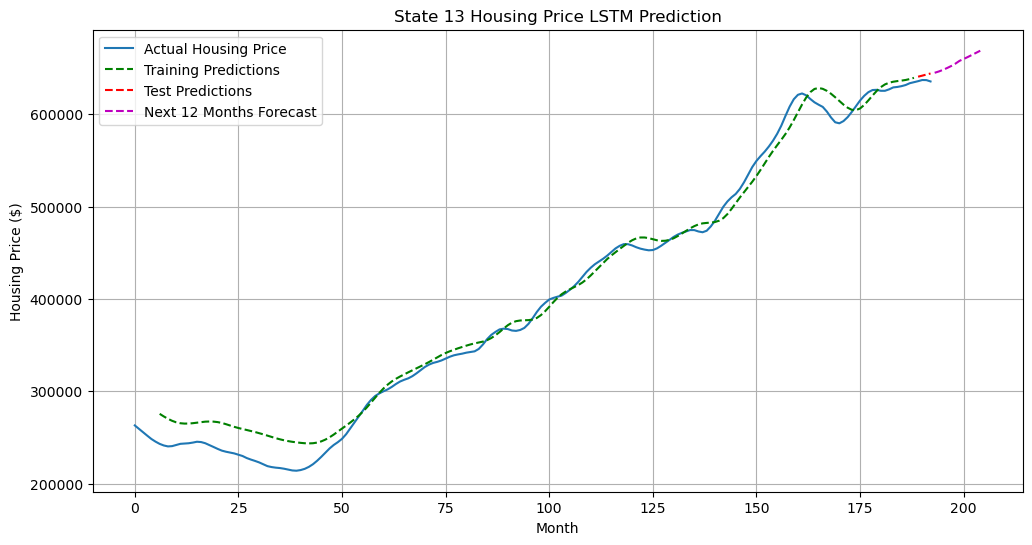

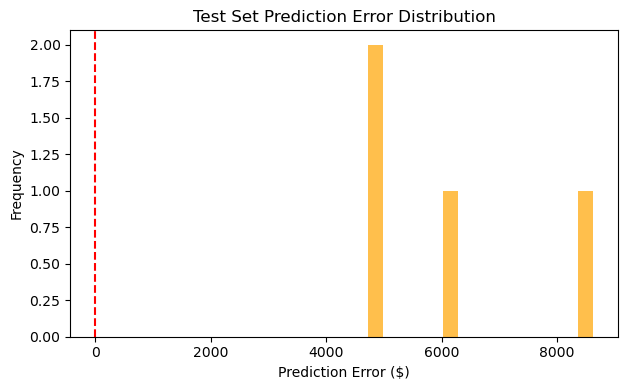


=========== Analyzing State 20 Housing Prices ===========
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0567 - val_loss: 0.2204
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - val_loss: 0.0570
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - val_loss: 0.0081
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0141
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0066
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0065
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0120
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0095
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0150
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2496e-04 - val_loss: 0.0108
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1083e-04 - val_loss

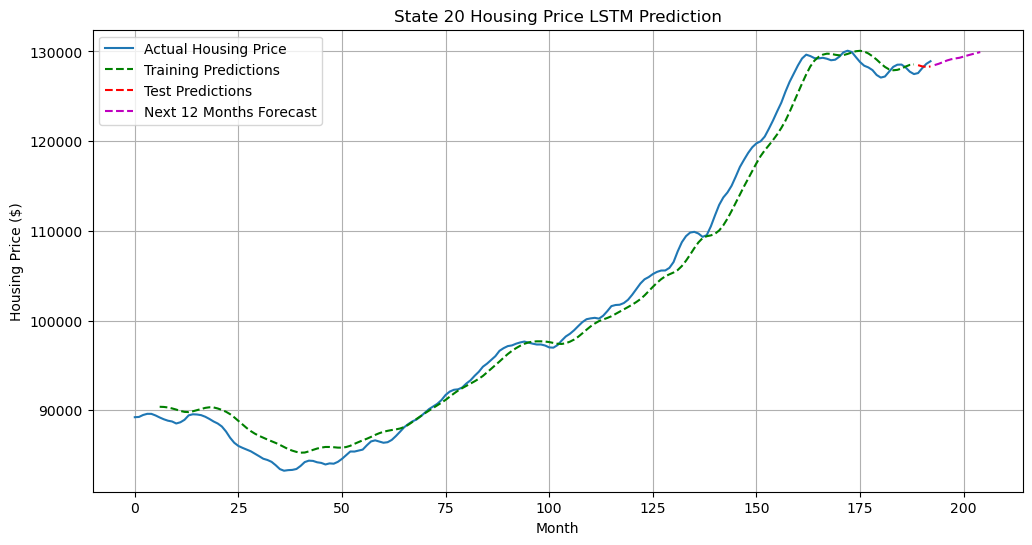

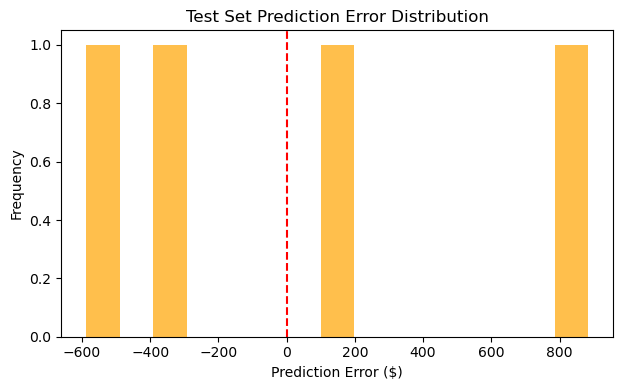

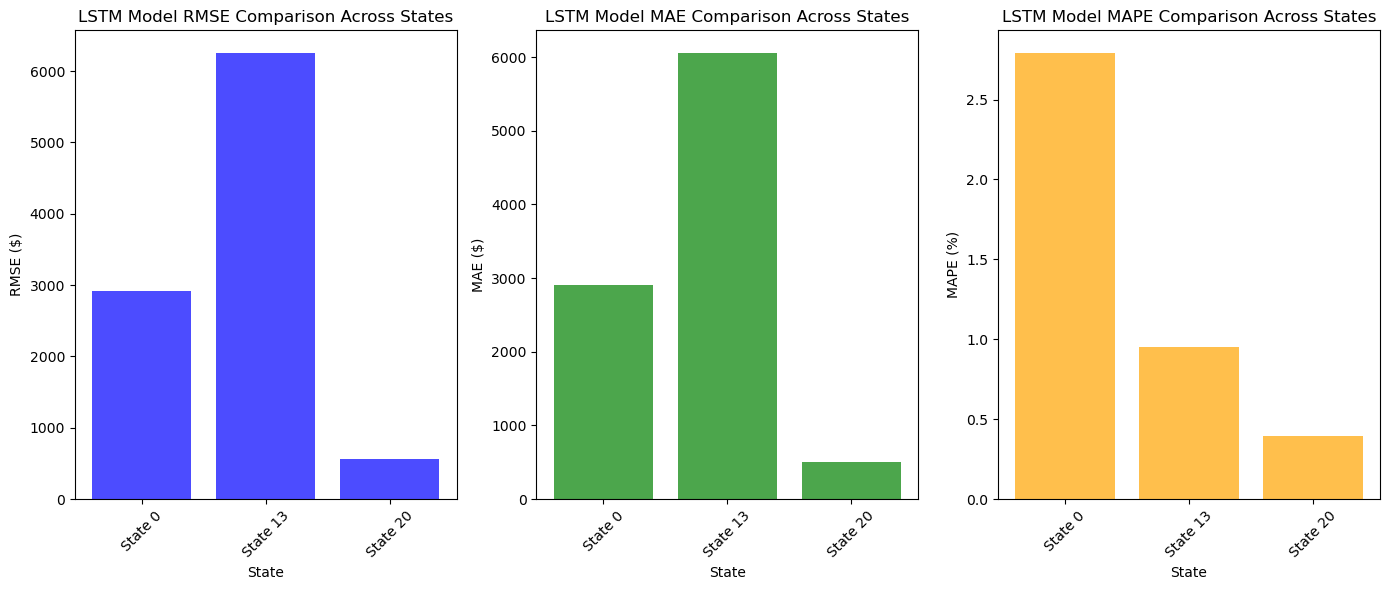

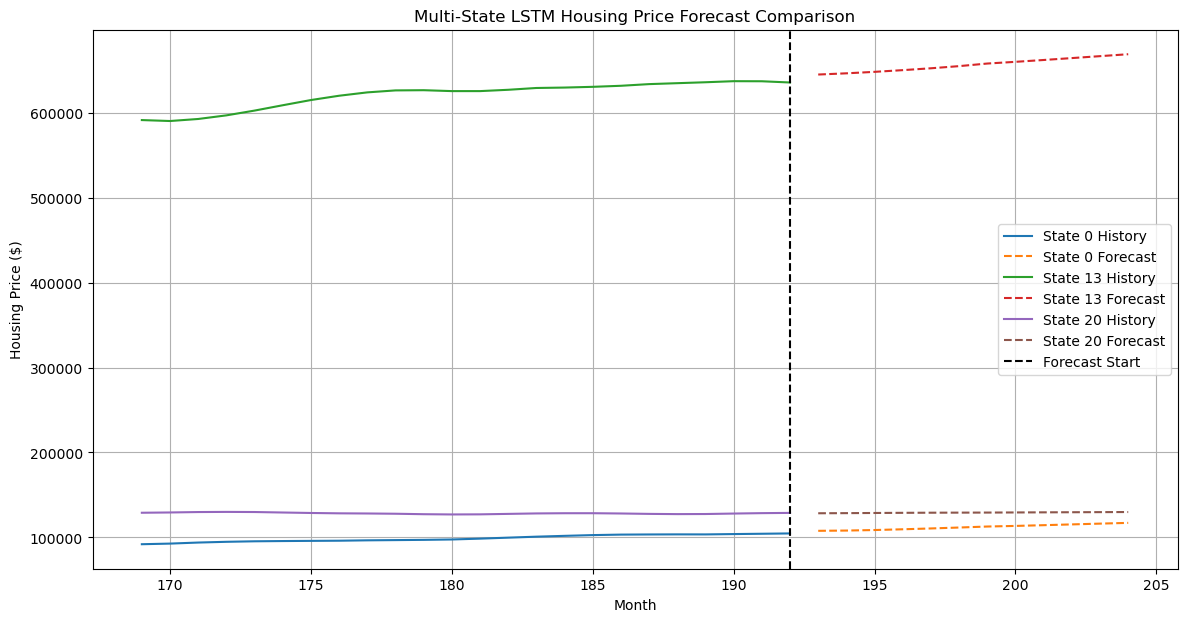


Housing Price Predictions and Model Performance Comparison:
   State  Current_Price  Predicted_Price  Growth_Rate        RMSE         MAE     MAPE
 State 0    104752.8406    117172.101562    11.855775 2912.066098 2910.452547 2.793602
State 13    635477.2104    668754.437500     5.236573 6259.210447 6061.032575 0.952698
State 20    128915.0138    129934.406250     0.790748  566.027968  502.363150 0.391841


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

def evaluate_model(y_true, y_pred, model_name="Model"):
    """Calculate and return multiple evaluation metrics"""
    # Calculate various evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Output results
    print(f"{model_name} Evaluation Metrics:")
    print(f"MSE: ${mse:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")
    
    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape,
        'y_true': y_true,
        'y_pred': y_pred
    }

def lstm_predict_state(state_index, look_back=6):
    """Create LSTM prediction model for specified state"""
    prices = price_matrix[state_index, :]
    
    # Normalize data
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))
    
    # Create dataset
    def create_dataset(dataset, look_back):
        X, y = [], []
        for i in range(len(dataset) - look_back):
            X.append(dataset[i:(i + look_back)])
            y.append(dataset[i + look_back])
        return np.array(X), np.array(y)
    
    # Reduce look_back to get more training samples
    X, y = create_dataset(prices_scaled, look_back)
    
    # Split data into train and test sets (85%/15% split)
    train_size = 183
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Reshape input for LSTM format
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Build simplified LSTM model
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(look_back, 1)))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Add early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    # Invert normalization
    train_predict = scaler.inverse_transform(train_predict)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predict = scaler.inverse_transform(test_predict)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate detailed evaluation metrics
    print(f"\nState {state_index} LSTM Model Evaluation:")
    train_metrics = evaluate_model(y_train_inv, train_predict, "Training Set")
    test_metrics = evaluate_model(y_test_inv, test_predict, "Test Set")
    
    # # Visualize training history
    # plt.figure(figsize=(12, 4))
    # plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.title(f'State {state_index} LSTM Model Training History')
    # plt.xlabel('Epochs')
    # plt.ylabel('Mean Squared Error Loss')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    
    # Visualize results
    plt.figure(figsize=(12, 6))
    
    # Plot original data
    plt.plot(prices, label='Actual Housing Price')
    
    # Create prediction indices
    train_predict_index = np.arange(look_back, look_back + len(train_predict))
    test_predict_index = np.arange(look_back + len(train_predict), look_back + len(train_predict) + len(test_predict))
    
    # Plot predictions
    plt.plot(train_predict_index, train_predict, 'g--', label='Training Predictions')
    plt.plot(test_predict_index, test_predict, 'r--', label='Test Predictions')
    
    # Predict next 12 months
    last_sequence = prices_scaled[-look_back:].reshape(1, look_back, 1)
    future_predictions = []
    
    current_sequence = last_sequence.copy()
    for _ in range(12):
        next_pred = model.predict(current_sequence)[0]
        future_predictions.append(next_pred[0])
        # Update sequence
        current_sequence = np.append(current_sequence[:, 1:, :], 
                                     [[next_pred]], 
                                     axis=1)
    
    future_predictions = np.array(future_predictions).reshape(-1, 1)
    future_prices = scaler.inverse_transform(future_predictions)
    
    # Plot future predictions
    future_index = np.arange(len(prices), len(prices) + len(future_prices))
    plt.plot(future_index, future_prices, 'm--', label='Next 12 Months Forecast')
    
    plt.title(f'State {state_index} Housing Price LSTM Prediction')
    plt.xlabel('Month')
    plt.ylabel('Housing Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Visualize prediction errors
    plt.figure(figsize=(12, 4))
    
    # # Training errors
    # train_errors = (train_predict - y_train_inv).flatten()
    # plt.subplot(1, 2, 1)
    # plt.hist(train_errors, bins=20, alpha=0.7, color='blue')
    # plt.axvline(x=0, color='red', linestyle='--')
    # plt.title('Training Set Prediction Error Distribution')
    # plt.xlabel('Prediction Error ($)')
    # plt.ylabel('Frequency')
    
    # Test errors
    test_errors = (test_predict - y_test_inv).flatten()
    plt.subplot(1, 2, 2)
    plt.hist(test_errors, bins=15, alpha=0.7, color='orange')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.title('Test Set Prediction Error Distribution')
    plt.xlabel('Prediction Error ($)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'scaler': scaler,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics,
        'future_predictions': future_prices,
        'history': history.history
    }

# Compare performance across different states
def compare_states_performance(selected_states):
    """Compare LSTM model performance across multiple states"""
    # Store results
    state_results = {}
    metrics_comparison = {
        'rmse': [],
        'mae': [],
        'mape': []
    }
    
    # Train model for each state
    for state_idx in selected_states:
        print(f"\n=========== Analyzing State {state_idx} Housing Prices ===========")
        result = lstm_predict_state(state_idx)
        state_results[state_idx] = result
        
        # Collect test metrics
        metrics_comparison['rmse'].append(result['test_metrics']['rmse'])
        metrics_comparison['mae'].append(result['test_metrics']['mae'])
        metrics_comparison['mape'].append(result['test_metrics']['mape'])
    
    # Visualize RMSE comparison
    plt.figure(figsize=(14, 6))
    
    # RMSE comparison
    plt.subplot(1, 3, 1)
    plt.bar([f'State {s}' for s in selected_states], metrics_comparison['rmse'], color='blue', alpha=0.7)
    plt.title('LSTM Model RMSE Comparison Across States')
    plt.xlabel('State')
    plt.ylabel('RMSE ($)')
    plt.xticks(rotation=45)
    
    # MAE comparison
    plt.subplot(1, 3, 2)
    plt.bar([f'State {s}' for s in selected_states], metrics_comparison['mae'], color='green', alpha=0.7)
    plt.title('LSTM Model MAE Comparison Across States')
    plt.xlabel('State')
    plt.ylabel('MAE ($)')
    plt.xticks(rotation=45)
    
    # MAPE comparison
    plt.subplot(1, 3, 3)
    plt.bar([f'State {s}' for s in selected_states], metrics_comparison['mape'], color='orange', alpha=0.7)
    plt.title('LSTM Model MAPE Comparison Across States')
    plt.xlabel('State')
    plt.ylabel('MAPE (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Compare future predictions
    plt.figure(figsize=(14, 7))
    
    for state_idx, result in state_results.items():
        # Get original prices for this state
        state_prices = price_matrix[state_idx, :]
        
        # Plot last 24 months of historical prices
        history_months = 24
        history_index = np.arange(len(state_prices) - history_months, len(state_prices))
        plt.plot(history_index, state_prices[-history_months:], label=f'State {state_idx} History')
        
        # Plot next 12 months predictions
        future_index = np.arange(len(state_prices), len(state_prices) + 12)
        plt.plot(future_index, result['future_predictions'], '--', label=f'State {state_idx} Forecast')
    
    plt.title('Multi-State LSTM Housing Price Forecast Comparison')
    plt.xlabel('Month')
    plt.ylabel('Housing Price ($)')
    plt.axvline(x=len(state_prices) - 1, color='k', linestyle='--', label='Forecast Start')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Create price growth rate table
    growth_data = []
    
    for state_idx in selected_states:
        result = state_results[state_idx]
        
        # Calculate growth rate
        current_price = price_matrix[state_idx, -1]
        future_price = result['future_predictions'][-1][0]
        growth_rate = (future_price - current_price) / current_price * 100
        
        growth_data.append({
            'State': f'State {state_idx}',
            'Current_Price': current_price,
            'Predicted_Price': future_price,
            'Growth_Rate': growth_rate,
            'RMSE': result['test_metrics']['rmse'],
            'MAE': result['test_metrics']['mae'],
            'MAPE': result['test_metrics']['mape']
        })
    
    # Create dataframe and print
    growth_df = pd.DataFrame(growth_data)
    print("\nHousing Price Predictions and Model Performance Comparison:")
    print(growth_df.to_string(index=False))
    
    return state_results, growth_df



# Create predictions for multiple states
selected_states = [0, 13, 20]  # Choose a few states for demonstration
state_results, performance_df = compare_states_performance(selected_states)




In [23]:
# collect all true value and predicted value
all_true = []
all_pred = []

for result in state_results.values():
    true_vals = result['test_metrics']['y_true'] if 'y_true' in result['test_metrics'] else None
    pred_vals = result['test_metrics']['y_pred'] if 'y_pred' in result['test_metrics'] else None
    
    all_true.extend(true_vals.flatten())
    all_pred.extend(pred_vals.flatten())

# calculate RMSE, MAE
overall_rmse = mean_squared_error(all_true, all_pred, squared=False)
overall_mae = mean_absolute_error(all_true, all_pred)

print(f"\n Overall LSTM Model Performance Across All States:")
print(f"RMSE (All States Combined): ${overall_rmse:.2f}")
print(f"MAE  (All States Combined): ${overall_mae:.2f}")


 Overall LSTM Model Performance Across All States:
RMSE (All States Combined): $3999.09
MAE  (All States Combined): $3157.95


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
